In [152]:
# python libraries
import matplotlib.pyplot as plt
import numpy as np
import csv
import copy 

In [216]:
# create list of weekends
weekends = []
for i in range(1,366):
    if (i/7).is_integer():
        weekends.extend(range(i+1,i+3))

# create function for list of simulated demand
def fun_demand():
    # creat empty list 
    sim_demand = []
    
    for i in range(1,366):
        # add random value to each week
        if ((i-1)/7).is_integer():
            week_rand = abs(np.random.normal(0, 3e4 , 1))[0]
        
        # weekdays
        if i not in weekends:
            sim_demand.append(6e5 + 1.2e5*np.sin(0.02*(i+35)) + abs(np.random.normal(0, 3e4 , 1)[0]) + week_rand)
    
        # weekends
        else:
            sim_demand.append(6e5 + 1.2e5*np.sin(0.02*(i+35)) + np.random.normal(-4e4, 2e4 , 1)[0])
    
    # return list
    return sim_demand

In [217]:
# create empty list to append element to
raw_data_demand = []

# open the CSV file in read mode
with open('Energy Demand.csv', 'r') as csvfile:
    # create a reader object
    csv_reader = csv.reader(csvfile)
    
    # iterate through the rows in the CSV file
    for row in csv_reader:
        # access each element in the row
        raw_data_demand.append(row)
        
# create energy list
demand = []
for i in range(len(raw_data_demand)-1):
    demand.append(int(raw_data_demand[len(raw_data_demand)-1-i][1])) 

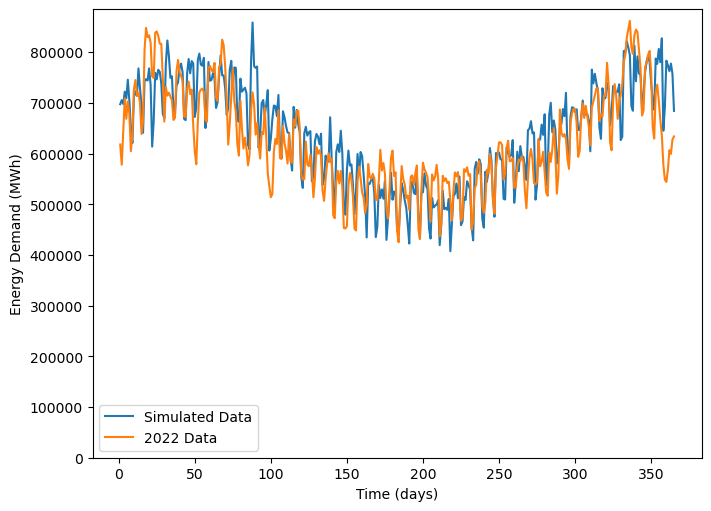

In [220]:
# create list of days
days_pts = np.linspace(1,365,365)

# set up plot
fig, axs = plt.subplots(1,1,layout='constrained',figsize=(7,5))

#plot graph
axs.plot(days_pts, fun_demand(), label='Simulated Data')
axs.plot(days_pts, demand, label='2022 Data')
axs.set_ylabel('Energy Demand (MWh)')
axs.set_xlabel('Time (days)')
axs.set_ylim(bottom=0)
axs.legend()

plt.savefig('Real World vs Simulated Energy Demand - slides', dpi=500)

In [156]:
# function to simulate wind production
def fun_wind(k):
    #create list
    sim_wind = []
    
    # set parameters
    a = 6
    b = 1
    c = 0.017
    d = 75

    for i in range(1,366):
        # generate value
        wind = float(k*(a + b*np.sin(c*(i+d)) + np.random.normal(0, 1.75 , 1)[0]))
    
        # set minimum value
        if wind < k*0.2:
            sim_wind.append(k*0.2)
        else:
            # set maximum value
            if wind > k*19:
                sim_wind.append(k*19)
            else:
                sim_wind.append(wind)
    
    # return list
    return sim_wind

In [175]:
# create empty list to append element to
raw_data_prod = []

# open the CSV file in read mode
with open('Generation by fuel type.csv', 'r') as csvfile:
    # create a reader object
    csv_reader = csv.reader(csvfile)
    
    # iterate through the rows in the CSV file
    for row in csv_reader:
        # access each element in the row
        raw_data_prod.append(row)


wind = []
for i in range(0,len(raw_data_prod)):
    if 'WIND' in raw_data_prod[i]:
        wind.append(int(raw_data_prod[i][-1]))
    
daily_wind = []
for i in range(0,int(np.floor(len(wind)/48))):
    data = 0
    for j in range(0,48):
        data += wind[i*48+j]
    daily_wind.append(data)

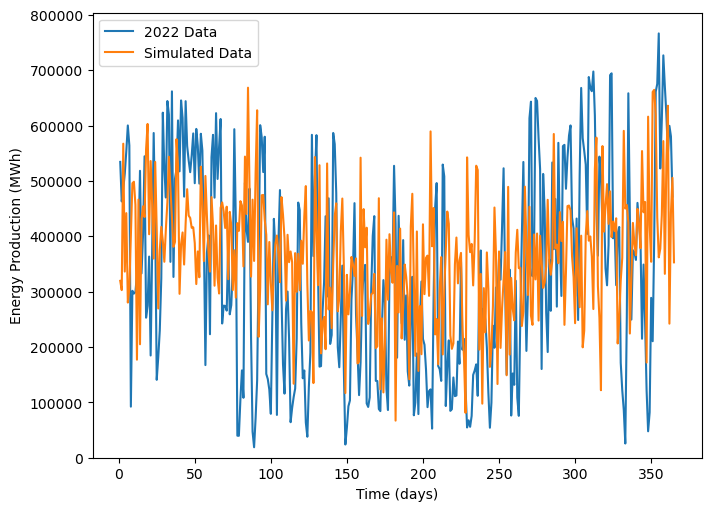

In [194]:
# create list of days
daily_wind_pts = np.linspace(1,len(daily_wind),len(daily_wind))

# set up plot
fig, axs = plt.subplots(1,1,layout='constrained',figsize=(7,5))

#plot graph
axs.plot(daily_wind_pts, daily_wind, label='2022 Data')
axs.plot(days_pts, fun_wind(60000), label='Simulated Data')
axs.set_ylabel('Energy Production (MWh)')
axs.set_xlabel('Time (days)')
axs.set_ylim(bottom=0)
axs.legend()

plt.savefig('Real World vs Simulated Wind Production - slides', dpi=500)

In [159]:
# function to simulate solar
def fun_solar(p):
    #create list
    sim_solar = []
    
    # set parameters
    a = 1.2
    b = 0.8
    c = 0.0172
    d = -91.25

    for i in range(1,366):
        # generate value
        if i in range(100, 300):
            solar = p*(float(a + b*np.sin(c*(i+d))) + np.random.normal(0, 0.45, 1)[0])
        else:     
            solar = p*(float(a + b*np.sin(c*(i+d))) + np.random.normal(0, 0.25, 1)[0])
    
        # set minimum value
        if solar < p*0.05:
            sim_solar.append(p*0.05)
        else:
            # set maximum value
            if solar > p*3:
                sim_solar.append(p*3)
            else:
                sim_solar.append(solar)
    
    # return list
    return sim_solar

In [160]:
# create empty list to append element to
raw_data_solar = []

# open the CSV file in read mode
with open('Solar PV Historical Results 2022.csv', 'r') as csvfile:
    # create a reader object
    csv_reader = csv.reader(csvfile)
    
    # iterate through the rows in the CSV file
    for row in csv_reader:
        # access each element in the row
        raw_data_solar.append(row)

# create list of solar production from each source
solar_grouped = []
for i in range(1,len(raw_data_solar)):
    solar_grouped.append([float(raw_data_solar[i][2]), float(raw_data_solar[i][3]), float(raw_data_solar[i][4])])

# create list of solar production averaged by source
solar_avg = []
for i in range(0,len(solar_grouped)):
    avg = (solar_grouped[i][0] + solar_grouped[i][1] + solar_grouped[i][2])/3
    solar_avg.append(avg)

# create list of daily solar
daily_solar = []
for i in range(0,int(np.floor(len(solar_avg)/48))):
    data = 0
    for j in range(0,48):
        data += solar_avg[i*48+j]
    daily_solar.append(data)

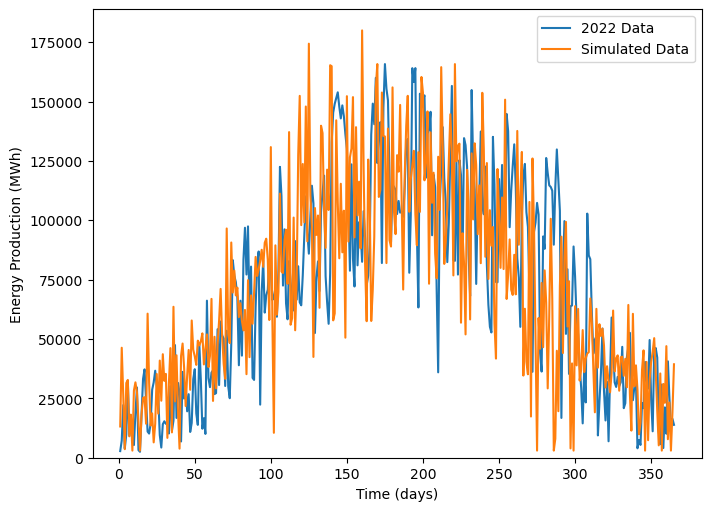

In [193]:
# set up plot
fig, axs = plt.subplots(1,1,layout='constrained',figsize=(7,5))

#plot graph
axs.plot(days_pts, daily_solar, label='2022 Data')
axs.plot(days_pts, fun_solar(60000), label='Simulated Data')
axs.set_ylabel('Energy Production (MWh)')
axs.set_xlabel('Time (days)')
axs.set_ylim(bottom=0)
axs.legend()

plt.savefig('Real World vs Simulated Solar Production - slides', dpi=500)

In [190]:
# function to simulate storage
def fun_storage(k,p,days):
    # set initial value (50%)
    storage = days/2*8e5
    
    # create empty list
    total_stored = []

    # generate the wind and demand lists once
    temp_wind = fun_wind(k)
    temp_solar = fun_solar(p)
    temp_demand = fun_demand()

    # loop each day
    for i in range(0,365):
        # update storage value
        storage += 0.8*(temp_wind[i] + temp_solar[i] - temp_demand[i])
    
        # cap storage value
        if storage > days*6.5e5:
            storage = days*6.5e5
        
        # update total stored list
        total_stored.append(float(storage))
        
    # return total stored list
    return total_stored

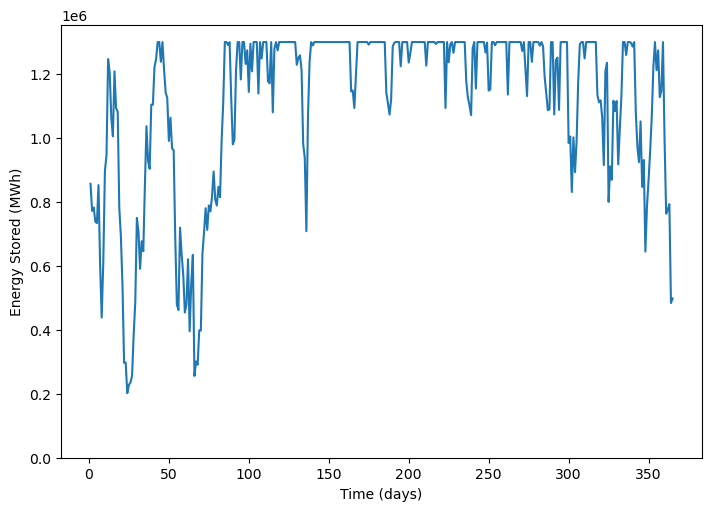

In [198]:
# set up plot
fig, axs = plt.subplots(1,1,layout='constrained',figsize=(7,5))

#plot graph
axs.plot(days_pts, fun_storage(100000, 100000, 2))
axs.set_ylabel('Energy Stored (MWh)')
axs.set_xlabel('Time (days)')
axs.set_ylim(bottom=0)

plt.savefig('Storage Simulation - slides', dpi=500)